(4363457, 8)
(3126480, 8)
(33487, 8)


,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
2098352,2.501770,1082.087361,432.528692,2016-01-01 00:16:00
2098470,0.103494,44.633840,431.270000,2016-01-01 02:14:00
2098578,1.051866,455.815478,433.340000,2016-01-01 04:02:00
2098670,12.318537,5365.169956,435.536288,2016-01-01 05:34:00
2098770,20.854500,9080.050595,435.400062,2016-01-01 07:14:00
...,...,...,...,...
4363204,0.544101,3753.430598,6898.402630,2020-04-21 19:48:00
4363265,0.227784,1568.484176,6885.829711,2020-04-21 20:49:00
4363327,1.016422,7018.573596,6905.176783,2020-04-21 21:51:00
4363393,0.050460,348.249935,6901.550000,2020-04-21 22:57:00


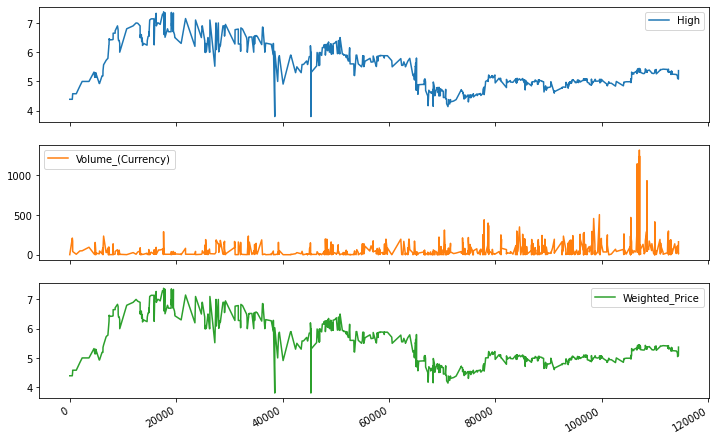

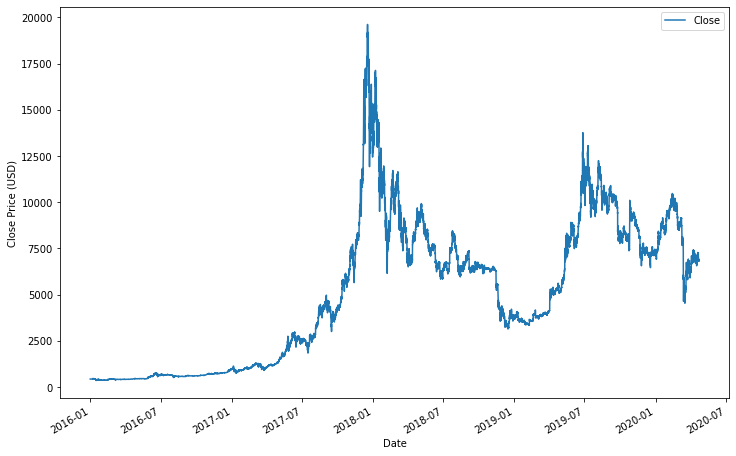

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 8)
import pandas as pd 
import numpy as np
bitcoin_set = pd.read_csv("/content/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv")
print(bitcoin_set.shape)
bitcoin_set.head()

bitcoin_set = bitcoin_set.dropna() #dropping the nan values
print(bitcoin_set.shape)
bitcoin_set.head(20)
# Recognizing the dataset
plot_cols = ['High', 'Volume_(Currency)', 'Weighted_Price']
plot_features = bitcoin_set[plot_cols][:1440]
_ = plot_features.plot(subplots=True)

bitcoin_set['Date'] = pd.to_datetime(bitcoin_set['Timestamp'],unit='s')
bitcoin_set.pop('Timestamp')
bitcoin_set.head()
# bitcoin_set.describe().transpose()
# #detecting anormal values
# bitcoin_set.sort_values('Date', inplace=True)
bitcoin_set = bitcoin_set[bitcoin_set['Date'] >= '2016']
bitcoin_set = bitcoin_set[12::60] #take a half day interval
date_time = Date[12::60]
bitcoin_set.head(10)
print(bitcoin_set.shape)
  
ax = bitcoin_set.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
bitcoin_set.drop(columns=['Low','High', 'Open', 'Close'])
#dropping the unneeded features

# Modelling


In [ ]:
#splitting the dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

#(75%, 15%, 10%) split for the training, validation, and test sets.
n = len(bitcoin_set)
train = bitcoin_set[0:int(n*0.75)]
val = bitcoin_set[int(n*0.75):int(n*0.9)]
test = bitcoin_set[int(n*0.9):]


# Normalization
train_mean = (train.mean())
train_std = (train.std())

train = (train - train_mean) / train_std
valid = (valid - train_mean) / train_std

In [ ]:
#Windowgenerator


def split_window(x):
  input_slice = slice(0, input_width)
  labels_slice = slice(input_width, None)

  inputs = x[:, input_slice, :]
  labels = x[:, labels_slice, :]

  labels = labels[:, :, -1:]

  inputs.set_shape([None, input_width, None])
  labels.set_shape([None, label_width, None])

  return inputs, labels


In [ ]:
# Build datasets
# -----------------------------------------------------------------------------

def prepare_set(data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=INUPT_WIDTH + LABEL_WIDTH,
      sequence_stride=1,
      shuffle=True,
      batch_size=BATCH_SIZE
  )


  ds = ds.map(split_window)

  return ds

In [ ]:


# Create train and validation datasets

train
BATCH_SIZE = 64
MAX_EPOCHS = 20
STEPS_PER_EPOCH = 1000
VALIDATION_STEPS = 100
INUPT_WIDTH = 24
LABEL_WIDTH = 1
STRIDE_WIDTH = 1
BUFFER_SIZE = 10000ed = prepare_set(train)
valided = prepare_set(val)
tested = prepare_set(test)


In [ ]:


# Compile and fit model
# -----------------------------------------------------------------------------

BATCH_SIZE = 64
MAX_EPOCHS = 20
STEPS_PER_EPOCH = 1000
VALIDATION_STEPS = 100
onput_width = 24
label_width = 1
STRIDE_WIDTH = 1
BUFFER_SIZE = 10000

def compile_and_fit(model, train_ds, valid_ds, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=patience,
    mode='min'
  )

  model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(),
    metrics=[tf.metrics.MeanAbsoluteError()]
  )

  history = model.fit(
    train_ds,
    epochs=MAX_EPOCHS,
    validation_data=valid_ds,
    callbacks=[early_stopping]
  )
  return history

